## <a id='toc1_1_'></a>[Data Visualization (2 of 2)](#toc0_)

**Table of contents**<a id='toc0_'></a>    
- [Data Visualization (2 of 2)](#toc1_1_)    
  - [I. Example Data Visualization](#toc1_2_)    
    - [I.1. Data overview](#toc1_2_1_)    
    - [I.2. Set up matplotlib parameters](#toc1_2_2_)    
    - [I.3. Visualizations](#toc1_2_3_)    
      - [I.3.1. Bar charts](#toc1_2_3_1_)    
      - [I.3.2. Histograms](#toc1_2_3_2_)    
      - [I.3.3. Scatterplot](#toc1_2_3_3_)    
      - [I.3.4. Line chart](#toc1_2_3_4_)    
        - [I.3.4.1. Sampling data](#toc1_2_3_4_1_)    
        - [I.3.4.2. Line chart](#toc1_2_3_4_2_)    
  - [II.  Descriptive Findings on Sales](#toc1_3_)    
    - [II.1. Histogram for column 'order_hour_of_day'](#toc1_3_1_)    
    - [II.2. Observation:](#toc1_3_2_)    
  - [III. Distribution of Orders Among Customers in Terms of Loyalty](#toc1_4_)    
    - [III.1. Bar chart for column 'loyalty_flag'](#toc1_4_1_)    
    - [III.2. Observation:](#toc1_4_2_)    
  - [IV. Difference in Expenditure Depending on the Hour of The Day](#toc1_5_)    
    - [IV.1. Line chart for columns 'prices' and 'order_hour_of_day'](#toc1_5_1_)    
    - [IV.2. Observation:](#toc1_5_2_)    
  - [V. Exploratory Analysis of Customer Demographics](#toc1_6_)    
    - [V.1. Determine whether there’s a connection between age and family situation](#toc1_6_1_)    
        - [V.1.1. Line chart for columns 'age' and 'number_of_dependants'](#toc1_6_1_1_1_)    
        - [V.1.2. Observation:](#toc1_6_1_1_2_)    
    - [V.2. Determine whether there’s a connection between age and spending power (income)](#toc1_6_2_)    
        - [V.2.1. Scatterplot for columns 'age' and 'income'](#toc1_6_2_1_1_)    
        - [V.2.2. Observation:](#toc1_6_2_1_2_)    
  - [VI. Exploratory Analysis of Products](#toc1_7_)    
    - [VI.1. Pie chart of price range distribution](#toc1_7_1_)    
    - [VI.2. Bar charts of department distributions in each price range](#toc1_7_2_)    
    - [VI.3. Observation:](#toc1_7_3_)    
  - [VI. Export Visualizations](#toc1_8_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import scipy

In [2]:
# create a path to the directory
path = r'C:\Users\Ansgar.S\Uyen\OneDrive\Documents\Data Immersion\Achievement IV - Python Fundamentals for Data Analysts\02-2023 Instacart Basket Analysis'

# import the 'orders_products_merged_4.pkl' dataset
df_ords_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_merged_4.pkl'))

In [3]:
# import the 'departments_wrangled.csv' dataset
df_deps = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

## <a id='toc1_2_'></a>[I. Example Data Visualization](#toc0_)

### <a id='toc1_2_1_'></a>[I.1. Data overview](#toc0_)

In [10]:
# check the column names in df_ords_merged
print('Column names in df_ords_merged:')
df_ords_merged.columns

Column names in df_ords_merged:


Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'first_purchase',
       'add_to_cart_order', 'reordered', 'price_range', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_price', 'spending_flag', 'order_freq', 'order_freq_flag',
       'first_name', 'last_name', 'gender', 'state', 'age', 'date_joined',
       'number_of_dependants', 'family_status', 'income', '_merge'],
      dtype='object')

In [11]:
# check the output of df_ords_merged
print('Random output of df_ords_merged:')
df_ords_merged.sample(5)

Random output of df_ords_merged:


,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,...,first_name,last_name,gender,state,age,date_joined,number_of_dependants,family_status,income,_merge
4037572,9387,Granny Smith Apples,24,4,8.8,1790396,67445,24,6,8,...,Ronald,Shelton,Male,Nevada,42,6/26/2018,0,single,161245,both
8315385,45646,Grated Parmesan Cheese,21,16,3.7,1703309,179761,3,0,12,...,Justin,Calderon,Male,Mississippi,76,4/11/2017,0,divorced/widowed,113275,both
3898985,24184,Red Peppers,83,4,1.0,5887,11236,56,5,12,...,Paul,Arellano,Male,Iowa,66,4/11/2017,2,married,161841,both
1680235,7835,Tomato Basil Cooking Sauce,9,9,12.4,2475683,2936,46,2,13,...,Kevin,Ortega,Male,North Dakota,31,10/5/2018,2,married,62769,both
21578909,4793,Wild Berry Smoothie,120,16,13.5,845108,189069,3,2,16,...,James,Alvarez,Male,Hawaii,25,7/26/2019,3,married,54807,both


### <a id='toc1_2_2_'></a>[I.2. Set up matplotlib parameters](#toc0_)

In [4]:
# set up the parameters
plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['font.size'] = 14
plt.rcParams['font.family'] = 'Lucida Console'
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'

In [5]:
# create a list of colors
earthy = ['#D2D79F', '#90B77D', '#42855B', '#F0EBCE', '#CFB997']

### <a id='toc1_2_3_'></a>[I.3. Visualizations](#toc0_)

#### <a id='toc1_2_3_1_'></a>[I.3.1. Bar charts](#toc0_)

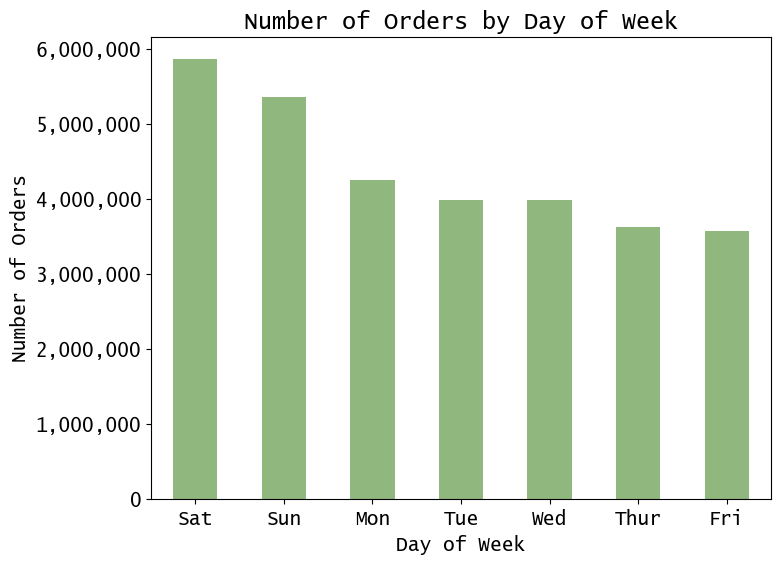

In [10]:
# create a bar chart for column 'orders_day_of_week'
bar_1 = df_ords_merged['orders_day_of_week'].value_counts().plot.bar(color = earthy[1], rot = 0)

# set axis labels and title
plt.xlabel('Day of Week')
plt.ylabel('Number of Orders')
plt.title('Number of Orders by Day of Week')

# change x-axis ticks
xtick_labels = ['Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thur', 'Fri']
xtick_values = range(0, 7)
plt.xticks(xtick_values, xtick_labels)

# set y-axis tick formatting to display non-scientific numbers
bar_1.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

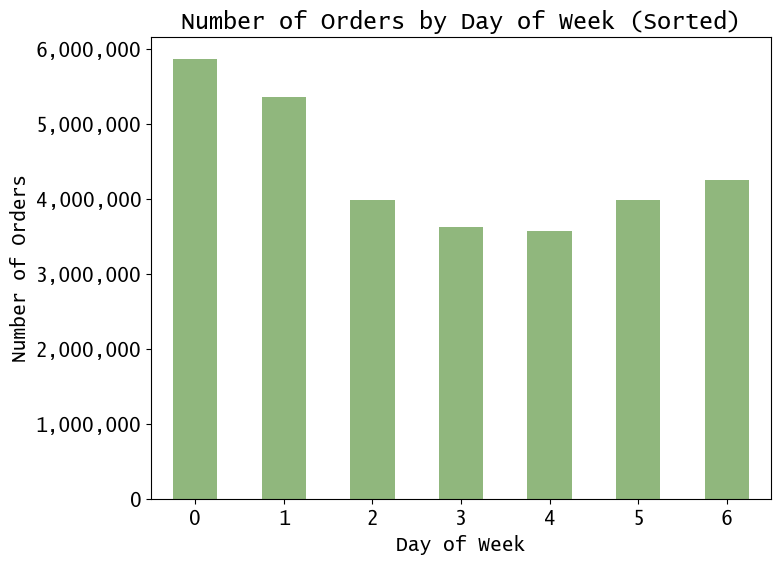

In [7]:
# create a bar chart for column 'orders_day_of_week' with the bars sorted according to their index order
bar_2 = df_ords_merged['orders_day_of_week'].value_counts().sort_index().plot.bar(color = earthy[1], rot = 0)

# set axis labels and title
plt.xlabel('Day of Week')
plt.ylabel('Number of Orders')
plt.title('Number of Orders by Day of Week (Sorted)')

# set y-axis tick formatting to display non-scientific numbers
bar_2.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

#### <a id='toc1_2_3_2_'></a>[I.3.2. Histograms](#toc0_)

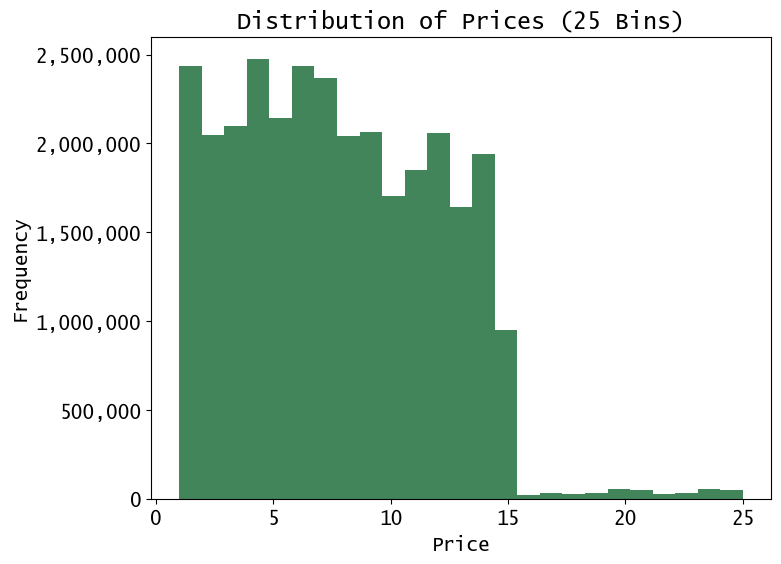

In [13]:
# create a histogram for column 'prices' with 25 bins
hist_1 = df_ords_merged['prices'].plot.hist(bins = 25, color = earthy[2])

# set axis labels and title
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Prices (25 Bins)')

# set y-axis tick formatting to display non-scientific numbers
hist_1.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

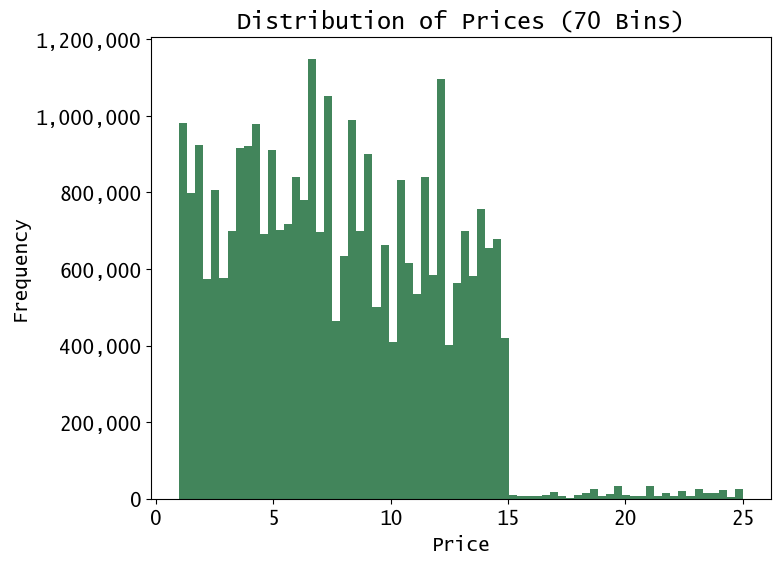

In [14]:
# create a histogram for the 'prices' column with 70 bins
hist_2 = df_ords_merged['prices'].plot.hist(bins = 70, color = earthy[2])

# set axis labels and title
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Prices (70 Bins)')

# set y-axis tick formatting to display non-scientific numbers
hist_2.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

#### <a id='toc1_2_3_3_'></a>[I.3.3. Scatterplot](#toc0_)

In [ ]:
# create a scatterplot for the 'prices' column
scatter = sns.scatterplot(x = 'prices',y = 'prices', data = df_ords_merged)

#### <a id='toc1_2_3_4_'></a>[I.3.4. Line chart](#toc0_)

##### <a id='toc1_2_3_4_1_'></a>[I.3.4.1. Sampling data](#toc0_)

In [77]:
# create a list 'dev' holding boolean values of random numbers less than or equal to 0.7
np.random.seed(4)
dev = np.random.rand(len(df_ords_merged)) <= 0.7

In [78]:
# store 70% of the sample in the dataframe 'big'
big = df_ords_merged[dev]

In [79]:
# store 30% of the sample in the dataframe 'small'
small = df_ords_merged[~dev]

In [9]:
# check to see the combined length of big and small is equal to that of df_ords_merged
print('The combined lengths of big and small is equal to that of df_ords_merged:')
(len(big)+len(small)) == len(df_ords_merged)

The combined lengths of big and small is equal to that of df_ords_merged:


True

In [16]:
# create a new dataframe 'df_2' that contains only columns 'prices' and 'orders_day_of_week' from small
df_2 = small[['orders_day_of_week','prices']]

##### <a id='toc1_2_3_4_2_'></a>[I.3.4.2. Line chart](#toc0_)

In [ ]:
# create a line chart from columns 'orders_day_of_week' and 'prices' columns from df_2
line = sns.lineplot(data=df_2, x='orders_day_of_week', y='prices', color = earthy[2], linewidth = 3)

# set axis labels and title
plt.xlabel('Day of Week')
plt.ylabel('Price')
plt.title('Price by Day of Week')

## <a id='toc1_3_'></a>[II.  Descriptive Findings on Sales](#toc0_)

### <a id='toc1_3_1_'></a>[II.1. Histogram for column 'order_hour_of_day'](#toc0_)

Text(0.5, 1.0, 'Number of Orders by Hour of Day')

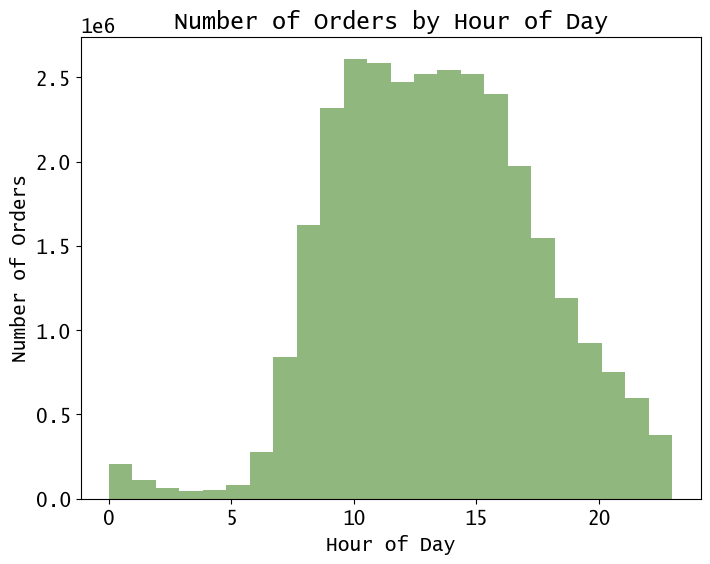

In [28]:
# create a histogram for the 'order_hour_of_day' column
hist_order = df_ords_merged['order_hour_of_day'].plot.hist(bins = 24, color = earthy[1])

# set axis labels and title
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.title('Number of Orders by Hour of Day')

In [18]:
# check the sales from df_ords_merged grouped by the 'order_hour_of_day' column
print('Sales from df_ords_merged grouped by the order_hour_of_day column:')
df_ords_merged.groupby('order_hour_of_day').agg({'order_id': ['count']}).sort_values(by=('order_id', 'count'), ascending = False)

Sales from df_ords_merged grouped by the order_hour_of_day column:


,order_id
,count
order_hour_of_day,
10,2609878
11,2585887
14,2543388
15,2519570
13,2517264
12,2474099
16,2398341
9,2320463


### <a id='toc1_3_2_'></a>[II.2. Observation:](#toc0_)
The histogram shows that sales begin to increase from 7am, reach their highest point at 10am, and then start to decline from 5pm.
The least active hours are from midnight until early morning at 5am.

## <a id='toc1_4_'></a>[III. Distribution of Orders Among Customers in Terms of Loyalty](#toc0_)

### <a id='toc1_4_1_'></a>[III.1. Bar chart for column 'loyalty_flag'](#toc0_)

In [25]:
# Define the color scheme as a dictionary mapping variables to colors
loyalty_colors = {
    'New customer': '#90B77D',
    'Regular customer':'#42855B',
    'Loyal customer': '#D2D79F'
}

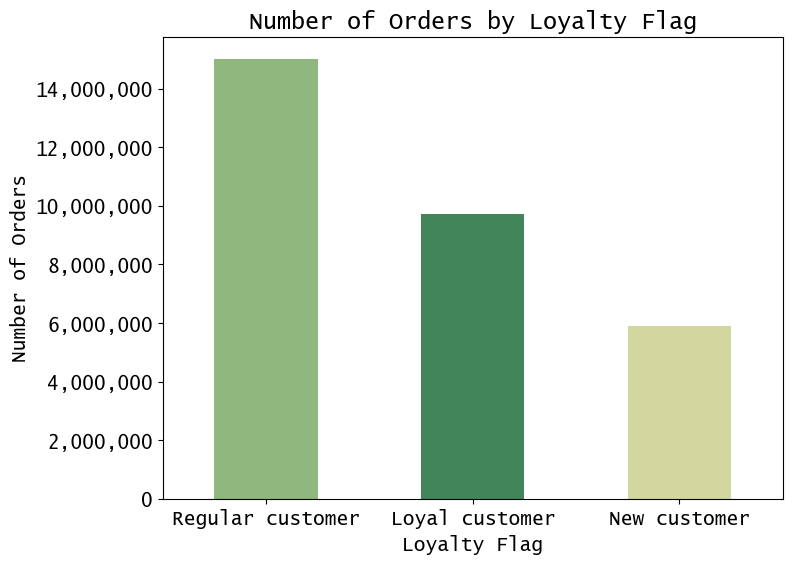

In [26]:
# create a bar chart for the 'loyalty_flag' column
bar_loyalty = df_ords_merged['loyalty_flag'].value_counts().plot.bar(color = [loyalty_colors['New customer'], loyalty_colors['Regular customer'], loyalty_colors['Loyal customer']], rot = 0)

# set axis labels and title
plt.xlabel('Loyalty Flag')
plt.ylabel('Number of Orders')
plt.title('Number of Orders by Loyalty Flag')

# set y-axis tick formatting to display non-scientific numbers
bar_loyalty.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

### <a id='toc1_4_2_'></a>[III.2. Observation:](#toc0_)
Some insights that can be derived from this data:

- There is a significant number of regular and loyal customers, with a combined total of over 24 million customers.
- The number of new customers is lower in comparison, with just over 5 million customers.

Instacart may want to focus on retaining its regular and loyal customers, as they are likely to be responsible for a large portion of the store's revenue.
Additionally, efforts can be made to attract new customers to the store and encourage them to become regular or loyal customers over time. This can be done through targeted marketing campaigns, offering promotions or discounts for first-time customers, or providing exceptional customer service to create a positive experience that encourages them to return.

## <a id='toc1_5_'></a>[IV. Difference in Expenditure Depending on the Hour of The Day](#toc0_)

### <a id='toc1_5_1_'></a>[IV.1. Line chart for columns 'prices' and 'order_hour_of_day'](#toc0_)

In [46]:
# create a new dataframe 'df_3' that contains only columns 'prices' and 'order_hour_of_day' from small
df_3 = small[['order_hour_of_day','prices']]

Text(0.5, 1.0, 'Average Price by Hour of Day')

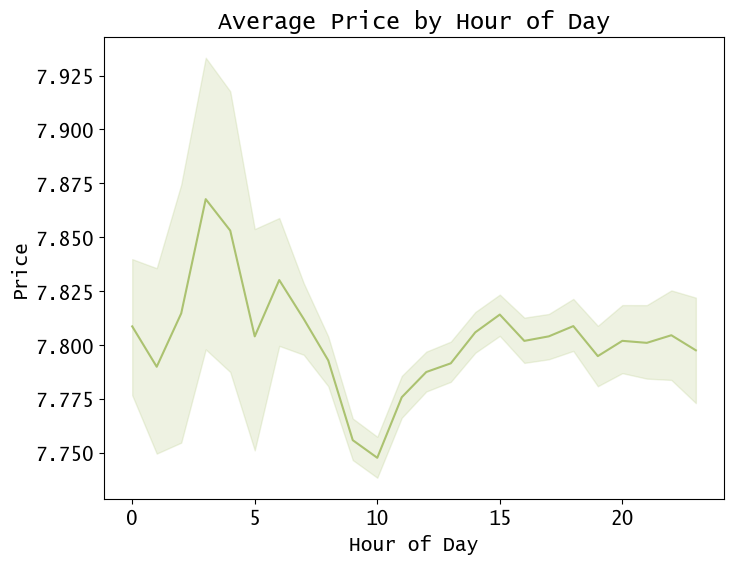

In [47]:
# create a line chart from columns 'prices' and 'order_hour_of_day' from df_3
line_prices_hour = sns.lineplot(data=df_3, x='order_hour_of_day', y='prices', color = earthy[0])

# set axis labels and title
plt.xlabel('Hour of Day')
plt.ylabel('Price')
plt.title('Average Price by Hour of Day')

### <a id='toc1_5_2_'></a>[IV.2. Observation:](#toc0_)
Prices are the highest during the early hours of the day when sales are the lowest, then fall until their lowest points at 10, which is the busiest hour.

## <a id='toc1_6_'></a>[V. Exploratory Analysis of Customer Demographics](#toc0_)

### <a id='toc1_6_1_'></a>[V.1. Determine whether there’s a connection between age and family situation](#toc0_)

##### <a id='toc1_6_1_1_1_'></a>[V.1.1. Line chart for columns 'age' and 'number_of_dependants'](#toc0_)

In [34]:
# create a new dataframe 'df_4' that contains only the 'age' and 'number_of_dependants' columns from small
df_4 = small[['age','number_of_dependants']]

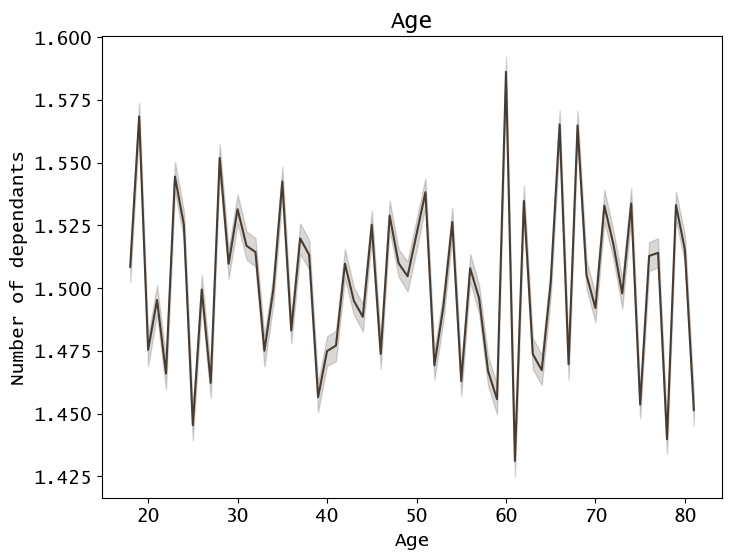

In [36]:
# create a line chart from the 'age' and 'number_of_dependants' columns from df_4
line_age_dependants = sns.lineplot(data = df_4, x = 'age', y = 'number_of_dependants', color = earthy[3])
plt.xlabel('Age')
plt.ylabel('Number of dependants')
plt.title('Age')
plt.show()

##### <a id='toc1_6_1_1_2_'></a>[V.1.2. Observation:](#toc0_)
From the line chart, no conclusive insights could be drawn. Instead, a different type of visualization may be more appropriate, i.e: a scatterplot.

### <a id='toc1_6_2_'></a>[V.2. Determine whether there’s a connection between age and spending power (income)](#toc0_)

##### <a id='toc1_6_2_1_1_'></a>[V.2.1. Scatterplot for columns 'age' and 'income'](#toc0_)

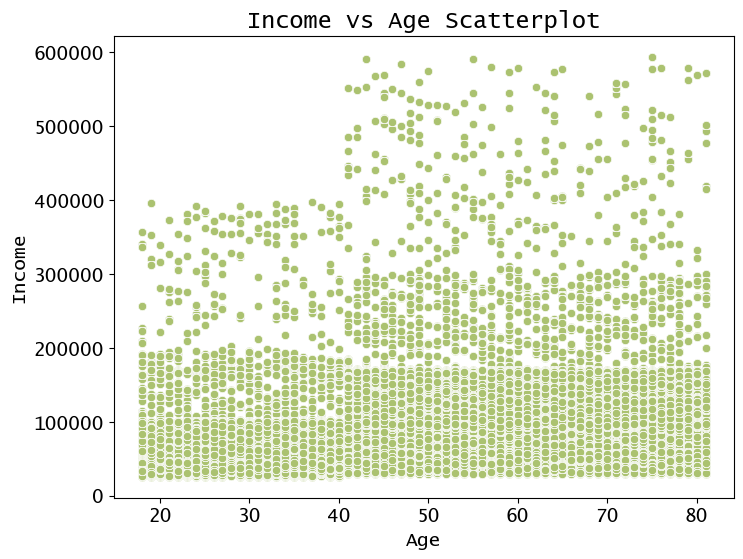

In [37]:
# create a scatterplot for the 'age' and 'income' columns
scatter_age_income = sns.scatterplot(x = 'age', y = 'income', data = df_ords_merged, color = earthy[0])
plt.title('Income vs Age Scatterplot')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

##### <a id='toc1_6_2_1_2_'></a>[V.2.2. Observation:](#toc0_)
From the scatterplot, generally the older the customer is, the stronger their spending power. Notably, customers in their 40s to 80s are the only people with income higher than 400,000 USD.

## <a id='toc1_7_'></a>[VI. Exploratory Analysis of Products](#toc0_)

### <a id='toc1_7_1_'></a>[VI.1. Pie chart of price range distribution](#toc0_)

In [126]:
# Define the color scheme as a dictionary mapping variables to colors
price_colors = {
    'Low-range product': '#D2D79F',
    'Mid-range product': '#90B77D',
    'High-range product': '#42855B'
}

Text(0, 0.5, '')

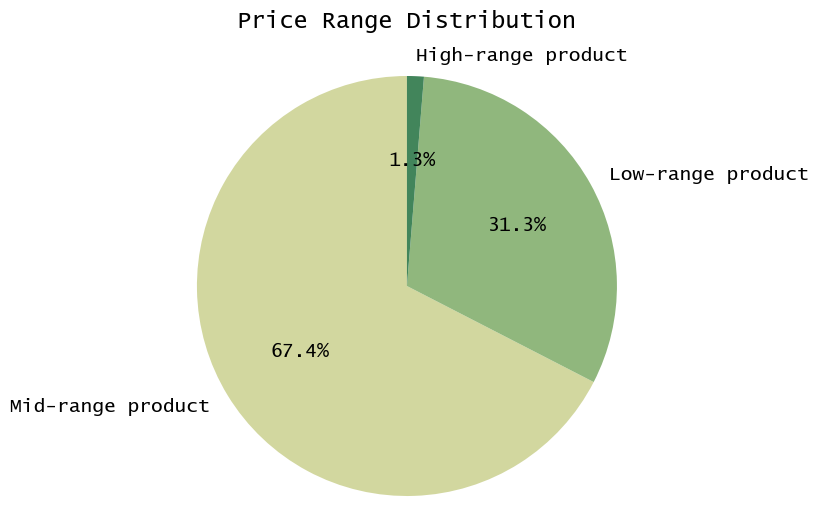

In [127]:
# create a pie chart from column 'price_range'
pie_price_range = small['price_range'].value_counts().plot(
    kind = 'pie',
    colors=[price_colors['Low-range product'], price_colors['Mid-range product'], price_colors['High-range product']],
    autopct = '%1.1f%%',
    startangle = 90
)
    
# set the title and aspect ratio
plt.title('Price Range Distribution', pad = 20)
plt.axis('equal')
    
# remove the y-axis label
plt.ylabel(None)

### <a id='toc1_7_2_'></a>[VI.2. Bar charts of department distributions in each price range](#toc0_)

In [ ]:
# check all departments
print('All departments:')
df_deps

All departments:


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [ ]:
# check data types in df_deps
print('Data types in df_deps:')
df_deps.dtypes

Data types in df_deps:


department_id     int64
department       object
dtype: object

In [149]:
# change data type of column 'department_id' to string
df_deps['department_id'] = df_deps['department_id'].astype('str')

In [163]:
# Merge dataframe small and df_deps on 'department_id''
merged = small.merge(df_deps, on = 'department_id', how = 'left')

In [165]:
# create a crosstab of department vs price range
price_range_department_crosstab = pd.crosstab(merged['department'], merged['price_range'], dropna = False).sort_values(by = 'Mid-range product', ascending = False)

In [166]:
print('Crosstab of price range vs department:')
price_range_department_crosstab

Crosstab of price range vs department:


price_range,High-range product,Low-range product,Mid-range product
department,,,
produce,0,765920,1923319
dairy eggs,1447,405729,1122796
beverages,0,241832,521091
frozen,0,192684,439883
pantry,63,151068,379770
snacks,0,515912,303112
bakery,0,82059,251276
canned goods,0,85187,218359
deli,0,89312,208862


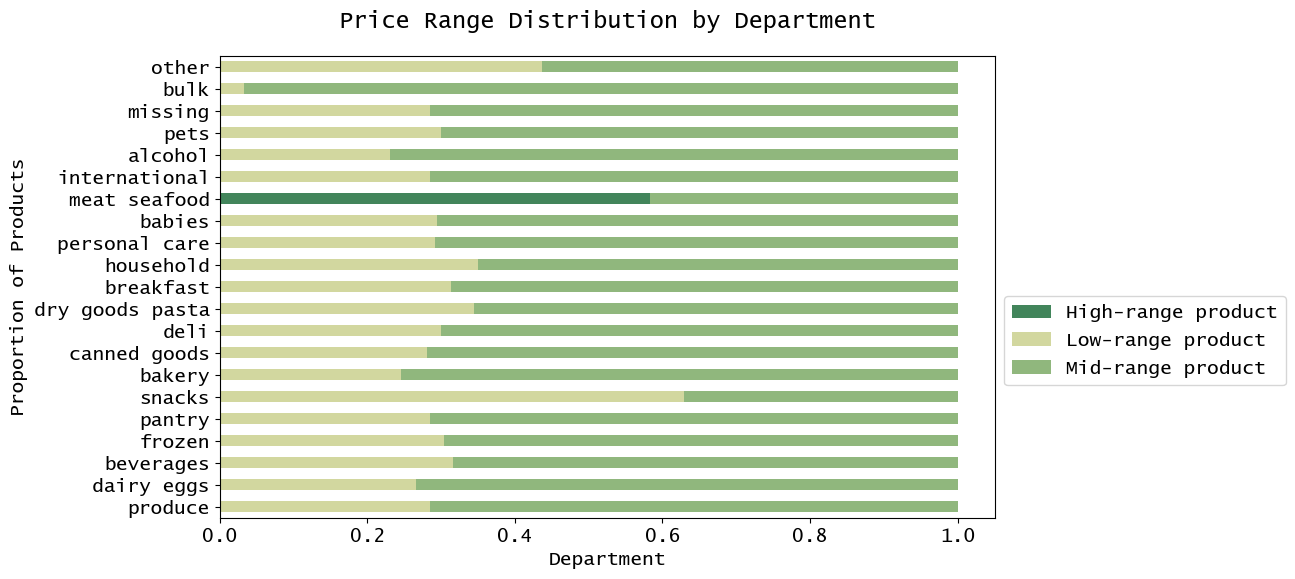

In [179]:
# Create the stacked bar chart, passing the colors dictionary to the color parameter
stacked_bar_price_dep = price_range_department_crosstab.div(price_range_department_crosstab.sum(axis=1), axis=0).plot(
    kind='barh', stacked=True, color=price_range_department_crosstab.columns.map(price_colors), figsize=(10, 6)
)

# Set the title and axis labels
plt.title('Price Range Distribution by Department', pad = 20)
plt.xlabel('Department')
plt.ylabel('Proportion of Products')
plt.legend(loc='best', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.show()

### <a id='toc1_7_3_'></a>[VI.3. Observation:](#toc0_)

Based on the charts, several key observations can be made:

- The majority of products fall into the mid-range price category, accounting for over two-thirds (67.4%) of all products. The *bulk* department has the largest number of mid-range products compared to other departments.

- Low-range products are the second most common, making up over 30% of all products. The *snack* department has the highest number of low-range products, followed by department *other*.

- High-range products account for only a small fraction (1.3%) of all products and are primarily found in the *meat seafood* section, with smaller numbers in *dairy eggs* and *pantry*.

A recommendation based on these insights would be to focus on the mid-range and low-range products, as they make up the majority of the store's inventory. Additionally, it may be beneficial to explore opportunities to increase the number of high-range products in other departments to appeal to a wider range of customers.

## <a id='toc1_8_'></a>[VI. Export Visualizations](#toc0_)

In [11]:
# export bar chart bar_1
bar_1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'), bbox_inches='tight')

In [12]:
# export bar chart bar_2
bar_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow_index.png'), bbox_inches='tight')

In [17]:
# export histogram hist_1
hist_1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices_25_bins.png'), bbox_inches='tight')

In [18]:
# export histogram hist_2
hist_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices_70_bins.png'), bbox_inches='tight')

In [ ]:
# export scatterplot scatter
scatter.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_prices.png'), bbox_inches='tight')

In [43]:
# export line chart line
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_orders_dow_prices.png'), bbox_inches='tight')

In [29]:
# export histogram hist_order
hist_order.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hour_of_day.png'), bbox_inches='tight')

In [27]:
# export bar chart bar_loyalty
bar_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag.png'), bbox_inches='tight')

In [46]:
# export line chart line_prices_hour
line_prices_hour.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices_order_hour_of_day.png'), bbox_inches='tight')

In [47]:
# export line chart line_age_dependants
line_age_dependants.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_number_of_dependants.png'), bbox_inches='tight')

In [48]:
# export line chart scatter_age_income
scatter_age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_age_income.png'), bbox_inches='tight')

In [169]:
# export pie chart pie_price_range
pie_price_range.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pie_price_range.png'), bbox_inches='tight')

In [180]:
# export pie chart stacked_bar_price_dep
stacked_bar_price_dep.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'stacked_bar_price_dep.png'), bbox_inches='tight')